In [6]:
import warnings
warnings.filterwarnings("ignore")

from keras import models, layers
embedding_dim = 32

# keras functional API is used for non-sequential models. like if you want to different inputs to one NN (sound and image together for example)
# this creates something that you can feed data into. It's the entry point for the network
input_img = layers.Input(shape=(784,))
print(input_img)

# ENCODER
# we can now apply this next layer on the input_img laye that we just created
# this is different to the way we've been building models so far. We can now call functions against layers
# this is a one layer encoder! very simple
# it takes 784 features as input, and outputs 32 as our embedding_dimension
encoded = layers.Dense(embedding_dim, activation='relu')(input_img)
print(encoded)

# DECODER
# we now apply our decoder to our encoding layer
# we don't use softmax because we're not talking about a probability distribution
# we use sigmoid because it will give us values between 0-1 that we can then turn into pixels
decoded = layers.Dense(784, activation='sigmoid')(encoded)
print(decoded)

# AUTOENCODER
# we can now put this together. We take our encoder neural network, and our decoded neural network
# this then becomes a joined neural network
autoencoder = models.Model(input_img,decoded)
autoencoder.summary()

Tensor("input_6:0", shape=(?, 784), dtype=float32)
Tensor("dense_2/Relu:0", shape=(?, 32), dtype=float32)
Tensor("dense_3/Sigmoid:0", shape=(?, 784), dtype=float32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [7]:
# we can see what the encoder section of our autoencoder looks like
# we make it it's own neural network
encoder = models.Model(input_img,encoded)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [10]:
# we can see the summary of our decoder also
# we take the 'encoded' data as input to the decoder network
encoded_input = layers.Input(shape=(embedding_dim,))
# we take the decoded layer of our autoencoder
decoder_layer = autoencoder.layers[-1]
# we make this it's own neural network
decoder = models.Model(encoded_input, decoder_layer(encoded_input))
decoder.summary()
# we now have 3 neural networks. an encoder, a decoder, and an autoencoder

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [11]:
# put the audoencoder together
autoencoder.compile(
    optimizer = 'adadelta',
    loss = 'binary_crossentropy'
)

In [13]:
# now we train our model
from keras.datasets import mnist
import numpy as np

# we're don't need the labels as we're not classifying, so we just put as _ so the labels are pulled into memory
(x_train, _),(x_test, _) = mnist.load_data()

# normalise the data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# reshape the data
# we want a 2D shape, and we want the second dimension to be 784
# the -1 works is a numpy thing that asks it to work out the shape you need
x_train = x_train.reshape((-1,784))
x_test = x_test.reshape((-1,784))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [15]:
# x_train becomes both our input and output data here
history = autoencoder.fit(x_train,
                x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test,x_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 23s 388us/step - loss: 0.1720 - val_loss: 0.1687
Epoch 2/50
60000/60000 [==============================] - 23s 384us/step - loss: 0.1680 - val_loss: 0.1648
Epoch 3/50
60000/60000 [==============================] - 23s 391us/step - loss: 0.1641 - val_loss: 0.1609
Epoch 4/50
60000/60000 [==============================] - 24s 396us/step - loss: 0.1604 - val_loss: 0.1573
Epoch 5/50
60000/60000 [==============================] - 24s 395us/step - loss: 0.1568 - val_loss: 0.1537
Epoch 6/50
60000/60000 [==============================] - 23s 385us/step - loss: 0.1534 - val_loss: 0.1504
Epoch 7/50
60000/60000 [==============================] - 23s 382us/step - loss: 0.1503 - val_loss: 0.1475
Epoch 8/50
60000/60000 [==============================] - 23s 381us/step - loss: 0.1473 - val_loss: 0.1445
Epoch 9/50
60000/60000 [==============================] - 23s 388us/step - loss: 0.1446 - val_

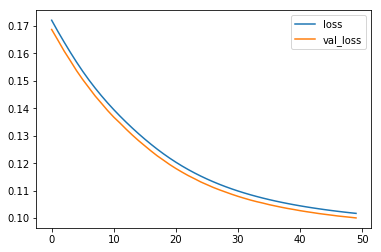

In [18]:
# this shows us how well the model performs in training and testing
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.close()

In [ ]:
encoded_imgs = encoder.predict(x_test) # these are images in latent space
decoded_imgs = decoder.predict(encoded_imgs) # these are decoded images that have come through the autoencoder
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(10000, 32)
(10000, 784)


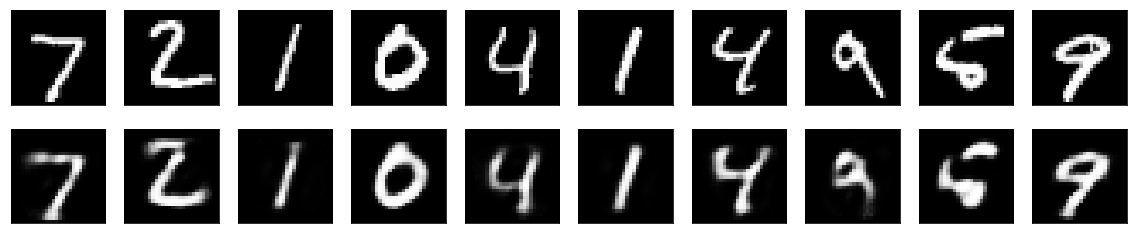

In [20]:
# Let's visualise 10 input and output images from our autoencoder
n = 10

plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape((28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape((28,28)),cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()
plt.close()